In [869]:
from defs import *
omega_n_arxiv = np.linspace(lower_lim, upper_lim, sample_points, endpoint=False)*2*pi/beta


In [920]:
def test_func(z):
    a = 1/(z + np.log(1 + z + 1j) -1 + np.log(2 + 1j))
    return a


def vec_mat_to_list(mat_in):
    p = []
    for i in range(len(mat_in[0])):
        p.append(mat_in[0][i])
    
    return(np.array(p))


def ave_arrays(in_array):
    out_array = np.array(in_array[0])
    for i in range(1, len(in_array)):
        out_array += in_array[i]
    out_array = out_array/len(in_array)
    return out_array

In [940]:
points = 40 # 1/2 the points selected from the sample points
final_say = 4 # 

lower_lim = -200
upper_lim = 300
sample_points = 250
omega_n_arxiv = np.linspace(lower_lim, upper_lim, sample_points, endpoint=False)*2*pi/beta # Matsubara Frequency
omega_n_raw = list(np.linspace(lower_lim, upper_lim, sample_points, endpoint=False))

omega = np.linspace(-24, 24, 960, endpoint=False) + 0.00001j # The omega for Real Axis
p_arxiv = []
q_arxiv = []
Sigma_ra_arxiv = []

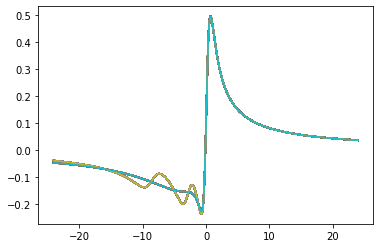

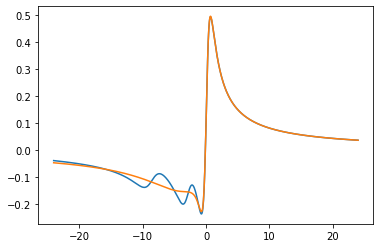

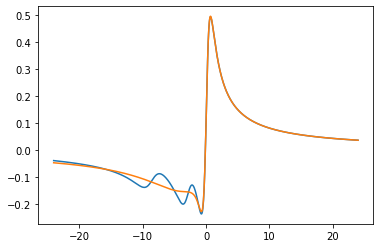

In [941]:

# Be cautious be set the lower limit have to be lower than 0
# Split the two parts, sampling with logarithm independently, and append them.
spacing = int((upper_lim-lower_lim)//sample_points)
if spacing != (upper_lim-lower_lim)/sample_points:
    raise Exception("The spacing has to be a integer, gentleman! \n\tRecommend to manipulate the upper/lower limit or number of points!")
name_list = []
if lower_lim > 0:
    raise Exception("Please check the lower limit, it has to be smaller than 0!") 

a = log(-lower_lim)
b = log(upper_lim)

for k in range(100):  # Do that for a hundred times

    for i in range(2 * points -1):
        # Generate a series of random numbers
        # Actually it is okay to do both the negative part and positive part together

        # Determine where we shall obtain those numbers, i.e. positive axis or negative.
        sgn = rd.random()# The random number that would tell you the sign of points
        if sgn > a/(a + b):
            raw_random = rd.uniform(log(spacing), b)
            point = exp(raw_random)
        else: 
            raw_random = rd.uniform(log(spacing), a)
            point = - exp(raw_random)
        
        point = point//spacing * spacing + upper_lim % spacing
        print
        rd_index = omega_n_raw.index(point)
        name_list.append(rd_index)

        # Choose 2*points solutions randomly Note that the total number cannot exceed the sample numbers.
    omega_n = []
    sigma = []
    for i in range(2*points - 1):   
        omega_n.append(omega_n_arxiv[name_list[i]]*1j)
        sigma.append(sigma_pro[name_list[i]])

    # In the algorithm we're gonna use we need two different sigmas.
    sigma_copy = sigma[:]   

    # The first one serves as the real Sigma matrix.
    sigma.append(test_func(0)) 
    Sigma = np.diag(sigma)

    # The second one, however, needs a zero.
    sigma_copy.append(0) 
    omega_n = np.array(omega_n)

    # Similarly we need two omegas
    omega_n_first = np.append(omega_n, 1)
    omega_n_real = np.append(omega_n, 0)

    # Revised Pade Method.
    K_1 = np.transpose(np.matrix(omega_n_first**(-final_say)))
    for i in range(1, final_say):  # final say means ... Well, FINALLY I'm gonna have this fucking stuff
        K_1 = np.hstack((K_1, np.transpose(np.matrix(np.append(omega_n**(i-final_say), 0)))))


    K_2 = -Sigma * K_1
    K = np.hstack((K_1, K_2))


    y = np.transpose(np.array([sigma_copy]))

    # print(K)
    # print(y)
    # print(Sigma)
    # print(K_1)
    # print(K_2)
    # file_p = "p_results.csv"

    p_q, resid, rank, s = np.linalg.lstsq(K, y, rcond=None) # doesn't converge indecate the problem with K
    p = np.transpose(p_q[:final_say])

    q = np.transpose(p_q[final_say:])

    q = np.hstack((q, np.matrix([1])))


    # file_q = "q_results.csv"


    X_N = np.matrix(omega**0)
    for i in range(1, final_say):
        X_N = np.vstack((X_N, np.matrix(omega**i)))

    X_D = np.vstack((X_N, np.matrix(omega**final_say)))
    Num = p * X_N  # N stands for numerator
    Dnu = q * X_D  # D stands for denominator

    Sigma_ra = np.squeeze(np.asarray(Num/Dnu))  # "ra" stands for real axis
    plt.plot(omega, np.real(Sigma_ra))
    plt.plot(omega, np.real(test_func(omega)))
    # plt.show()


    p_arxiv.append(vec_mat_to_list(p))
    q_arxiv.append(vec_mat_to_list(np.array(q)))
    Sigma_ra_arxiv.append(list(Sigma_ra))

plt.show()

q_ave = ave_arrays(q_arxiv)
p_ave = ave_arrays(p_arxiv)


X_N = np.matrix(omega**0)
for i in range(1, final_say):
    X_N = np.vstack((X_N, np.matrix(omega**i)))

X_D = np.vstack((X_N, np.matrix(omega**final_say)))
Num = p_ave * X_N  # N stands for numerator
Dnu = q_ave * X_D  # D stands for denominator

Sigma_ra_ave_mn = np.squeeze(np.asarray(Num/Dnu))  # "ra" stands for real axis
plt.plot(omega, np.real(Sigma_ra_ave_mn))
plt.plot(omega, np.real(test_func(omega)))

plt.show()


plt.plot(omega, np.real(ave_arrays(Sigma_ra_arxiv)))
plt.plot(omega, np.real(test_func(omega)))
plt.show()

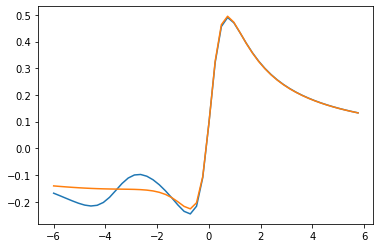

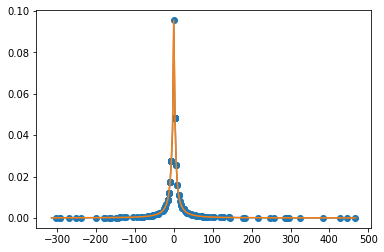

In [843]:
omega_i = omega_n_arxiv*1j  # Examine whether my algorithm is right by force the p and q

X_N = np.matrix(omega_i**0)
for i in range(1, final_say):
    X_N = np.vstack((X_N, np.matrix(omega_i**i)))

X_D = np.vstack((X_N, np.matrix(omega_i**final_say)))
Num = p * X_N  # N stands for numerator
Dnu = q * X_D  # D stands for denominator

Sigma_im = np.squeeze(np.real(np.asarray(Num/Dnu)))  # "ra" stands for real axis
plt.scatter(np.imag(omega_n_real), sigma)
plt.plot(omega_n_arxiv, np.real(Sigma_im))
plt.plot(omega_n_arxiv, np.real(test_func(omega_n_arxiv*1j)))


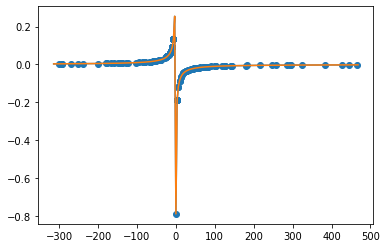

In [844]:
plt.plot(omega_n_arxiv, np.squeeze(np.imag(np.asarray(Num/Dnu))))
plt.plot(omega_n_arxiv, np.imag(test_func(omega_n_arxiv*1j)))
plt.scatter(np.imag(omega_n_real), np.imag(sigma))


In [879]:
np.real(Sigma_ra_ave)

array([-0.10210209, -0.08123512, -0.07555439, -0.08067169, -0.09199646,
       -0.10676189, -0.12364467, -0.14209151, -0.16180434, -0.18226139,
       -0.20200459, -0.21739728, -0.2211851 , -0.20424827, -0.16677181,
       -0.12798659, -0.10861385, -0.11202138, -0.13145725, -0.16024064,
       -0.19353847, -0.22584822, -0.24584221, -0.22727721, -0.12272539,
        0.09557348,  0.33784114,  0.47804481,  0.54218425,  0.47902328,
        0.43606169,  0.39453182,  0.35760317,  0.32580591,  0.29866054,
        0.27545343,  0.25550172,  0.23822492,  0.22315042,  0.20989926,
        0.19816857,  0.18771558,  0.17834462,  0.16989688,  0.16224249,
        0.15527445,  0.14890392,  0.14305663,  0.13767005,  0.13269119])

In [833]:
len(q_arxiv)

40

In [867]:
np.real(ave_arrays(Sigma_ra))

0.05228997195910041

In [691]:
type(p)

numpy.ndarray

In [901]:
300 % 13

1

In [905]:
4.0 == 4

True